In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import  DecisionTreeClassifier

In [4]:
data_train = pd.read_csv('dc-wikia-data.csv')

data_train.head(20)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0
5,1448,Wonder Woman (Diana Prince),\/wiki\/Wonder_Woman_(Diana_Prince),Public Identity,Good Characters,Blue Eyes,Black Hair,Female Characters,NaN,Living Characters,1231.0,"1941, December",1941.0
6,1486,Aquaman (Arthur Curry),\/wiki\/Aquaman_(Arthur_Curry),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,1121.0,"1941, November",1941.0
7,1451,Timothy Drake (New Earth),\/wiki\/Timothy_Drake_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1095.0,"1989, August",1989.0
8,71760,Dinah Laurel Lance (New Earth),\/wiki\/Dinah_Laurel_Lance_(New_Earth),Public Identity,Good Characters,Blue Eyes,Blond Hair,Female Characters,NaN,Living Characters,1075.0,"1969, November",1969.0
9,1380,Flash (Barry Allen),\/wiki\/Flash_(Barry_Allen),Secret Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,1028.0,"1956, October",1956.0


In [5]:
def alive_id(ALIVE):
    if ALIVE == 'Living Characters':
        return 1
    else:
        return 0
    
data_train['ALIVE'] = data_train['ALIVE'].fillna(0)
data_train['ALIVE_ID'] = data_train['ALIVE'].apply(alive_id)
data_train.head(20)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,ALIVE_ID
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0,1
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0,1
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0,1
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0,1
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0,1
5,1448,Wonder Woman (Diana Prince),\/wiki\/Wonder_Woman_(Diana_Prince),Public Identity,Good Characters,Blue Eyes,Black Hair,Female Characters,NaN,Living Characters,1231.0,"1941, December",1941.0,1
6,1486,Aquaman (Arthur Curry),\/wiki\/Aquaman_(Arthur_Curry),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,1121.0,"1941, November",1941.0,1
7,1451,Timothy Drake (New Earth),\/wiki\/Timothy_Drake_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1095.0,"1989, August",1989.0,1
8,71760,Dinah Laurel Lance (New Earth),\/wiki\/Dinah_Laurel_Lance_(New_Earth),Public Identity,Good Characters,Blue Eyes,Blond Hair,Female Characters,NaN,Living Characters,1075.0,"1969, November",1969.0,1
9,1380,Flash (Barry Allen),\/wiki\/Flash_(Barry_Allen),Secret Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,1028.0,"1956, October",1956.0,1


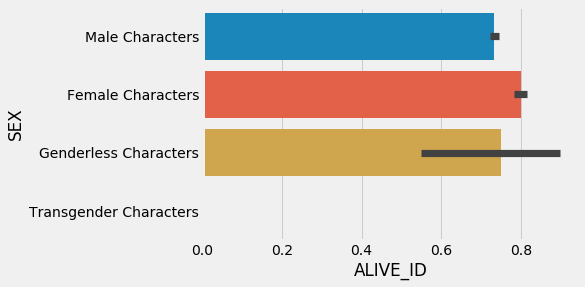

In [6]:
plt.style.use('fivethirtyeight')
sns.barplot(x='ALIVE_ID', y='SEX', data=data_train)

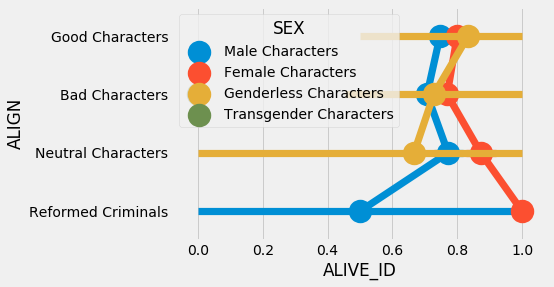

In [7]:
sns.pointplot(x='ALIVE_ID', y='ALIGN',hue='SEX', data=data_train)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


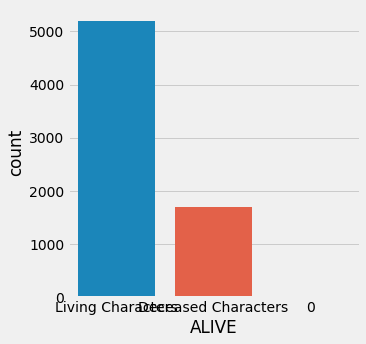

In [8]:
sns.factorplot('ALIVE',data=data_train,kind="count")

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

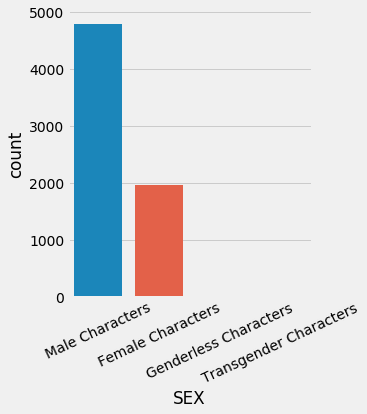

In [9]:
sns.factorplot('SEX',data=data_train,kind="count")
plt.xticks(rotation=25)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

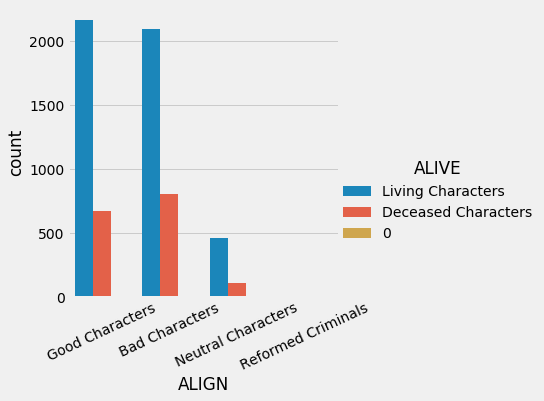

In [10]:
sns.factorplot(x='ALIGN', kind='count', hue='ALIVE', data=data_train)
plt.xticks(rotation=25)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

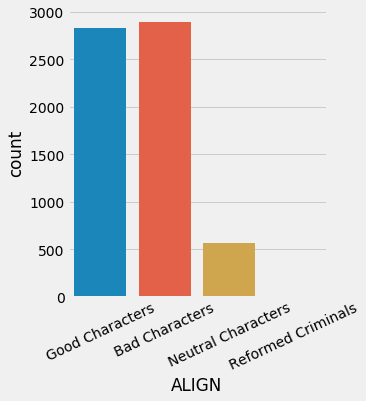

In [11]:
sns.factorplot('ALIGN',data=data_train,kind="count")
plt.xticks(rotation=25)

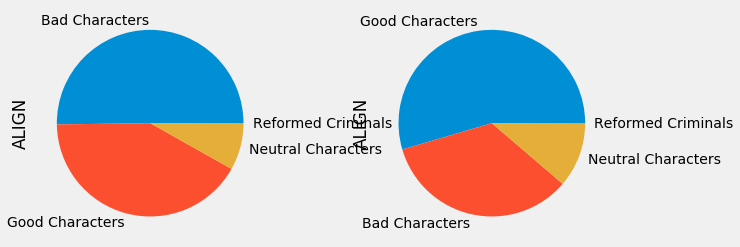

In [12]:
fig = plt.figure(figsize=(10,4))
fig.add_subplot(121)
data_train.ALIGN[data_train['SEX'] == 'Male Characters'].value_counts().plot(kind='pie')
fig.add_subplot(122)
data_train.ALIGN[data_train['SEX'] == 'Female Characters'].value_counts().plot(kind='pie')

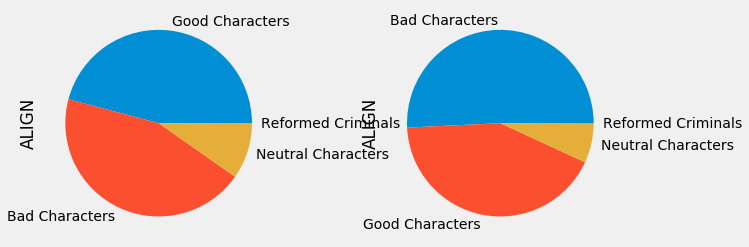

In [13]:
fig = plt.figure(figsize=(10,4))
fig.add_subplot(121)
data_train.ALIGN[data_train['ALIVE'] == 'Living Characters'].value_counts().plot(kind='pie')
fig.add_subplot(122)
data_train.ALIGN[data_train['ALIVE'] == 'Deceased Characters'].value_counts().plot(kind='pie')

# Predictions

In [14]:
data_train['ALIGN'].replace('Good Characters',2, inplace = True)
data_train['ALIGN'].replace('Bad Characters',1, inplace = True)
data_train['ALIGN'].replace('Neutral Characters',3, inplace = True)
data_train['ALIGN'].replace('Reformed Criminals',3, inplace = True)

data_train['SEX'].replace('Male Characters', 2, inplace = True)
data_train['SEX'].replace('Female Characters', 1, inplace = True)
data_train['SEX'].replace('Genderless Characters', 3, inplace = True)
data_train['SEX'].replace('Transgender Characters', 4, inplace = True)

data_train['ALIVE'].replace('Living Characters', 1, inplace = True)
data_train['ALIVE'].replace('Deceased Characters', 0, inplace = True)

data_train['ID'].replace('Secret Identity', 2, inplace = True)
data_train['ID'].replace('Public Identity', 1, inplace = True)
data_train['ID'].replace('Identity Unknown', 3, inplace = True)

data_train['GSM'].replace('Bisexual Characters', 1, inplace = True)
data_train['GSM'].replace('Homosexual Characters', 2, inplace = True)

data_train.replace(np.nan, 0,inplace=True)
data_train.ALIVE = data_train.ALIVE.astype(int)
data_train.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,ALIVE_ID
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),2.0,2.0,Blue Eyes,Black Hair,2.0,0.0,1,3093.0,"1939, May",1939.0,1
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),2.0,2.0,Blue Eyes,Black Hair,2.0,0.0,1,2496.0,"1986, October",1986.0,1
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),2.0,2.0,Brown Eyes,Brown Hair,2.0,0.0,1,1565.0,"1959, October",1959.0,1
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),1.0,2.0,Brown Eyes,White Hair,2.0,0.0,1,1316.0,"1987, February",1987.0,1
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),2.0,2.0,Blue Eyes,Black Hair,2.0,0.0,1,1237.0,"1940, April",1940.0,1


In [15]:
gsm = data_train['GSM'].values.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
gsm_scaled = min_max_scaler.fit_transform(gsm)
data_train['GSM'] = pd.DataFrame(gsm_scaled)

id = data_train['ID'].values.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
id_scaled = min_max_scaler.fit_transform(id)
data_train['ID'] = pd.DataFrame(id_scaled)


sex = data_train['SEX'].values.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
sex_scaled = min_max_scaler.fit_transform(sex)
data_train['SEX'] = pd.DataFrame(sex_scaled)

align = data_train['ALIGN'].values.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
align_scaled = min_max_scaler.fit_transform(align)
data_train['ALIGN'] = pd.DataFrame(align_scaled)

page_id = data_train['page_id'].values.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
page_id_scaled = min_max_scaler.fit_transform(page_id)
data_train['page_id'] = pd.DataFrame(page_id_scaled)

app = data_train['APPEARANCES'].values.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
app_scaled = min_max_scaler.fit_transform(app)
data_train['APPEARANCES'] = pd.DataFrame(app_scaled)

year = data_train['YEAR'].values.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
year_scaled = min_max_scaler.fit_transform(year)
data_train['YEAR'] = pd.DataFrame(year_scaled)

data_train.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,ALIVE_ID
0,0.000104,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),0.666667,0.666667,Blue Eyes,Black Hair,0.5,0.0,1,1.000000,"1939, May",0.963239,1
1,0.054658,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),0.666667,0.666667,Blue Eyes,Black Hair,0.5,0.0,1,0.806984,"1986, October",0.986587,1
2,0.000194,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),0.666667,0.666667,Brown Eyes,Brown Hair,0.5,0.0,1,0.505981,"1959, October",0.973174,1
3,0.000693,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),0.333333,0.666667,Brown Eyes,White Hair,0.5,0.0,1,0.425477,"1987, February",0.987084,1
4,0.000487,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),0.666667,0.666667,Blue Eyes,Black Hair,0.5,0.0,1,0.399935,"1940, April",0.963736,1


In [16]:
round(data_train['ALIVE'].corr(data_train['GSM']) *100, 2)

2.99

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data_train[['GSM', 'SEX', 'ALIGN','ID']], data_train['ALIVE'], test_size = 0.3)

Decitison Tree Algorithm

In [18]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
acc_dtc = round(dtc.score(X_test, y_test) *100, 2)
print(acc_dtc)

75.74


Logistic Regression


In [19]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = round(lr.score(X_test, y_test) *100, 2)
print(acc_lr)

75.93


KNN

In [21]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = round(lr.score(X_test, y_test) *100, 2)
print(acc_knn)

75.93


Support Vectro Machine (SVM)

In [22]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

75.18

Gaussian

In [23]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred_gaussian = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

75.18

Perceptron

In [24]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

25.4

Linear SVC

In [25]:
linearsvc = LinearSVC()
linearsvc.fit(X_train, y_train)
y_pred_linear_svc = linearsvc.predict(X_test)
acc_linearsvc = round(linearsvc.score(X_train, y_train) * 100, 2)
acc_linearsvc

75.18

Stohastic Gradient Descent

In [26]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

75.18

Random Forest

In [27]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
acc_forest = round(forest.score(X_train, y_train) * 100, 2)
acc_forest

75.31

In [28]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVC', 'KNN', 'Gaussian', 'Perceptron', 'Linear SVC', 'SGD', 'Tree', 'Forest'],
    'Score': [acc_lr, acc_svc, acc_knn, acc_gaussian, acc_perceptron, acc_linearsvc, acc_sgd, acc_dtc, acc_forest]
})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,75.93
2,KNN,75.93
7,Tree,75.74
8,Forest,75.31
1,SVC,75.18
3,Gaussian,75.18
5,Linear SVC,75.18
6,SGD,75.18
4,Perceptron,25.40
